In [1]:
import numpy as np
import pandas as pd
import patsy

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                            DecisionTreeRegressor as DTR,
                            plot_tree,
                            export_text)
from sklearn.metrics import (accuracy_score, log_loss)
from sklearn.ensemble import \
    (RandomForestRegressor as RF,
    GradientBoostingRegressor as GBR)
from ISLP.bart import BART

# Loading
Run either one of Stock Data or Carseats Data

## Stock Data

In [3]:
Stock = load_data("Smarket")
Stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
formula = "Today~  Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume - 1"
Y, X = patsy.dmatrices(formula, Stock)
Y = np.where(Y> 0, 1, -1)   # Predict on Zero and 1

## Carseats Data

In [5]:
Carseats = load_data("Carseats")
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
formula = "Sales~  CompPrice + Income + Advertising+ Population + Price + ShelveLoc + Age + Education + Urban + US"
Y, X = patsy.dmatrices(formula, Carseats)
Y = np.where(Y> 8, 1, -1)   # Predict on Zero and 1

# Fitting Classifier

## Splitting

In [7]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Fitting

In [8]:
clf = DTC(criterion = 'entropy', random_state = 0, max_depth = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [9]:
accuracy_score(y_train, clf.predict(X_train))

0.7

In [10]:
accuracy_score(y_test, clf.predict(X_test))

0.6166666666666667

# Adaboosting.M1

In [11]:
import fun.ml.boosting as boost
import importlib
importlib.reload(boost)

<module 'fun.ml.boosting' from '/Users/dominicleung/projects/fun/fun/ml/boosting/__init__.py'>

In [12]:
clf = DTC(criterion = 'entropy', random_state = 0, max_depth = 3)
pred = boost.adaboost_m1(X_train, y_train, clf, M = 50)

In [13]:
accuracy_score(y_train, pred(X_train))

0.725

In [14]:
accuracy_score(y_test, pred(X_test))

0.5916666666666667

## Evaluate

In [17]:
all_M = np.arange(1, 400, 20)

In [18]:
clf = DTC(criterion = 'entropy', random_state = 0, max_leaf_nodes = 8)

In [19]:
out_train = np.zeros(len(all_M))
out_test = np.zeros(len(all_M))
for i, M in enumerate(all_M):
    pred = boost.adaboost_m1(X_train, y_train, clf, M = M)
    out_train[i] = accuracy_score(y_train, pred(X_train))
    out_test[i] = accuracy_score(y_test, pred(X_test))

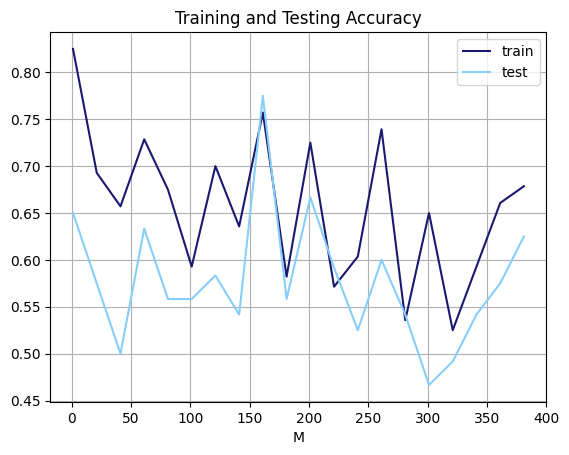

In [20]:
plt.plot(all_M, out_train, color = 'midnightblue', label ='train')
plt.plot(all_M, out_test, color = 'lightskyblue', label = 'test')
plt.grid()
plt.legend()
plt.title('Training and Testing Accuracy')
plt.xlabel("M");